In [76]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumBarunGothic') 

In [2]:
data = pd.read_csv('/content/Auction_master_train.csv')

In [3]:
data.shape

(1933, 41)

In [4]:
def outlier(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    lb = q1 - (iqr*1.5)
    ub = q3 + (iqr*1.5)
    
    return np.where((data>ub)|(data<lb))

In [5]:
tmp = data['addr_si'].unique()
data = data.reset_index()

In [6]:
d = []
for i in tmp:
    ind = outlier(data[data['addr_si']==i]['Hammer_price'])
    ind2 = list(data[data['addr_si']==i].iloc[ind[0],:]['index'])
    if len(ind2) != 0 :
        d = d+ind2

In [7]:
data = data.drop(index=d)

#### Column 확인

#### 기본적인 통계학적 정보


In [8]:
data.describe(include='all')

,index,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
count,1855.000000,1855.000000,1855,1855,1.855000e+03,1855,1855,1855.00000,1855.000000,1.855000e+03,1855.000000,1855.000000,1855.000000,1855.000000,1.855000e+03,1.855000e+03,1855,1855,1855,1855,1855,1855,1855,23,1855,1851.000000,865.000000,1855,1855,1855,1855.000000,1855.000000,54,1855,1855,1832.000000,152.000000,1855,1855,1855.000000,1855.000000,1.855000e+03
unique,NaN,NaN,2,3,NaN,237,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493,404,1,436,2,39,281,9,2,NaN,NaN,1852,2,1219,NaN,NaN,45,2,1022,NaN,NaN,385,2,NaN,NaN,NaN
top,NaN,NaN,임의,일반,NaN,자연감정,2015-08-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-26 00:00:00,2016-04-26 00:00:00,낙찰,Private,서울,노원구,상계동,모전리,N,NaN,NaN,1층 101호,아파트,1111-11-11 00:00:00,NaN,NaN,"**1차감정: 220,000,000",N,마포대로,NaN,NaN,2016-09-08 00:00:00,배당,NaN,NaN,NaN
freq,NaN,NaN,1377,1728,NaN,33,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,18,1855,465,1185,127,52,10,1834,NaN,NaN,3,1593,39,NaN,NaN,5,1782,31,NaN,NaN,37,1843,NaN,NaN,NaN
mean,960.679245,1387.190836,NaN,NaN,3.216146e+08,NaN,NaN,1.82965,0.784906,3.390271e+04,39.848178,38.868819,90.971892,88.817623,4.406402e+08,3.737138e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602.180443,22.898266,NaN,NaN,NaN,16.519137,8.383288,NaN,NaN,NaN,127.706878,12.723684,NaN,NaN,36.689370,127.738972,4.258225e+08
std,558.830996,801.050375,NaN,NaN,1.107561e+09,NaN,NaN,0.90491,0.813577,9.548608e+04,21.479045,21.649587,38.369868,39.332171,3.579022e+08,2.985136e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,554.398456,67.821295,NaN,NaN,NaN,8.606120,7.046788,NaN,NaN,NaN,190.116179,10.758762,NaN,NaN,1.153388,0.995315,3.417362e+08
min,0.000000,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,1.00000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,35.051385,126.809393,6.303000e+06
25%,479.500000,697.500000,NaN,NaN,7.500000e+07,NaN,NaN,1.00000,0.000000,2.923350e+03,25.825000,24.420000,59.990000,59.940000,2.045000e+08,1.710000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.000000,1.000000,NaN,NaN,NaN,11.000000,3.000000,NaN,NaN,NaN,24.000000,5.000000,NaN,NaN,35.187051,126.959210,1.928504e+08
50%,955.000000,1403.000000,NaN,NaN,1.630764e+08,NaN,NaN,2.00000,1.000000,1.341580e+04,37.310000,36.500000,84.870000,84.810000,3.500000e+08,3.010000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,482.000000,5.000000,NaN,NaN,NaN,15.000000,6.000000,NaN,NaN,NaN,56.000000,9.000000,NaN,NaN,37.499554,127.065498,3.450000e+08
75%,1442.500000,2070.500000,NaN,NaN,3.392815e+08,NaN,NaN,2.00000,1.000000,4.123500e+04,51.295000,50.225000,114.645000,114.120000,5.400000e+08,4.628000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,829.500000,18.000000,NaN,NaN,NaN,20.000000,12.000000,NaN,NaN,NaN,143.000000,17.250000,NaN,NaN,37.566212,129.018739,5.315550e+08


## 1. 시간과 관련된 변수에 의한 시계열적 Trend 확인





##### 1) Appraisal_date

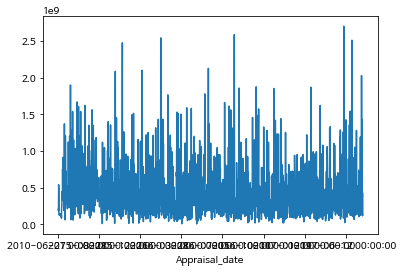

In [9]:
data_date= data[['Appraisal_date','Hammer_price']]
data_date_sort=data_date.sort_values(by=['Appraisal_date'],axis=0)
new_date_data = data_date_sort.set_index('Appraisal_date')
new_date_data['Hammer_price'].plot()

**Appraisal_date에 따른 시계열적 trend는 확인할 수 없었음**

##### 2) First_auction_date

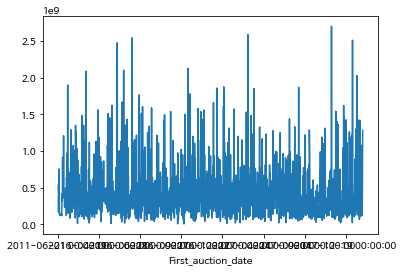

In [10]:
data_date= data[['First_auction_date','Hammer_price']]
data_date_sort=data_date.sort_values(by=['First_auction_date'],axis=0)
new_date_data = data_date_sort.set_index('First_auction_date')
new_date_data['Hammer_price'].plot()

**First_auction_date에 따른 시계열적 trend는 확인할 수 없었음**

##### 3)Final_auction_date

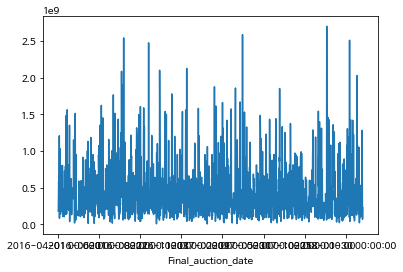

In [11]:
data_date= data[['Final_auction_date','Hammer_price']]
data_date_sort=data_date.sort_values(by=['Final_auction_date'],axis=0)
new_date_data = data_date_sort.set_index('Final_auction_date')
new_date_data['Hammer_price'].plot()

**Final_auction_date에 따른 시계열적 trend는 확인할 수 없었음**

##### 4)Preserve_regist_date

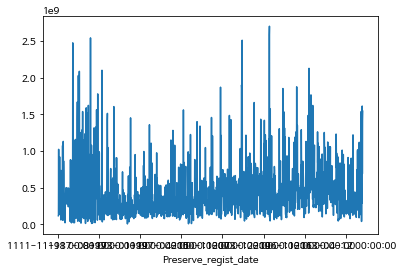

In [12]:
data_date= data[['Preserve_regist_date','Hammer_price']]
data_date_sort=data_date.sort_values(by=['Preserve_regist_date'],axis=0)
new_date_data = data_date_sort.set_index('Preserve_regist_date')
new_date_data['Hammer_price'].plot()

**Preserve_regist_date에 따른 시계열적 trend는 확인할 수 없었음**

##### 5) Close_date

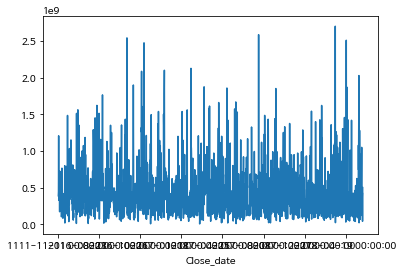

In [13]:
data_date= data[['Close_date','Hammer_price']]
data_date_sort=data_date.sort_values(by=['Close_date'],axis=0)
new_date_data = data_date_sort.set_index('Close_date')
new_date_data['Hammer_price'].plot()

**Close_date에 따른 시계열적 trend는 확인할 수 없었음**

## 2. Categorical 변수들의 Category에 따른 Y값의 차이 확인


##### 1) Auction_class

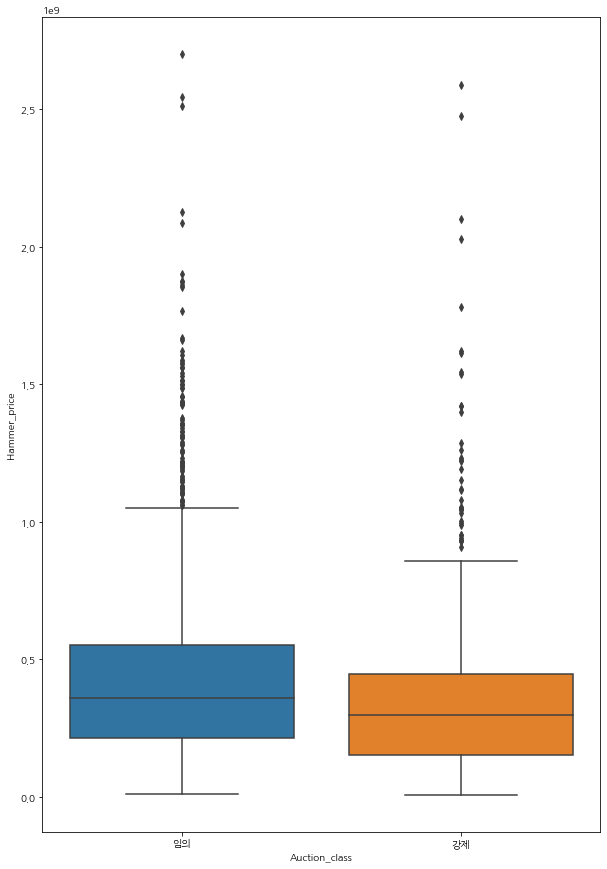

In [14]:
plt.rc('font', family='NanumGothic') 
figure, ax1 = plt.subplots(figsize=(10,15))

sns.boxplot(x='Auction_class',y="Hammer_price", data = data )

**Auction_class의 카테고리에 따른 Y의 차이는 거의 없음**

##### 2) Appraisal_company

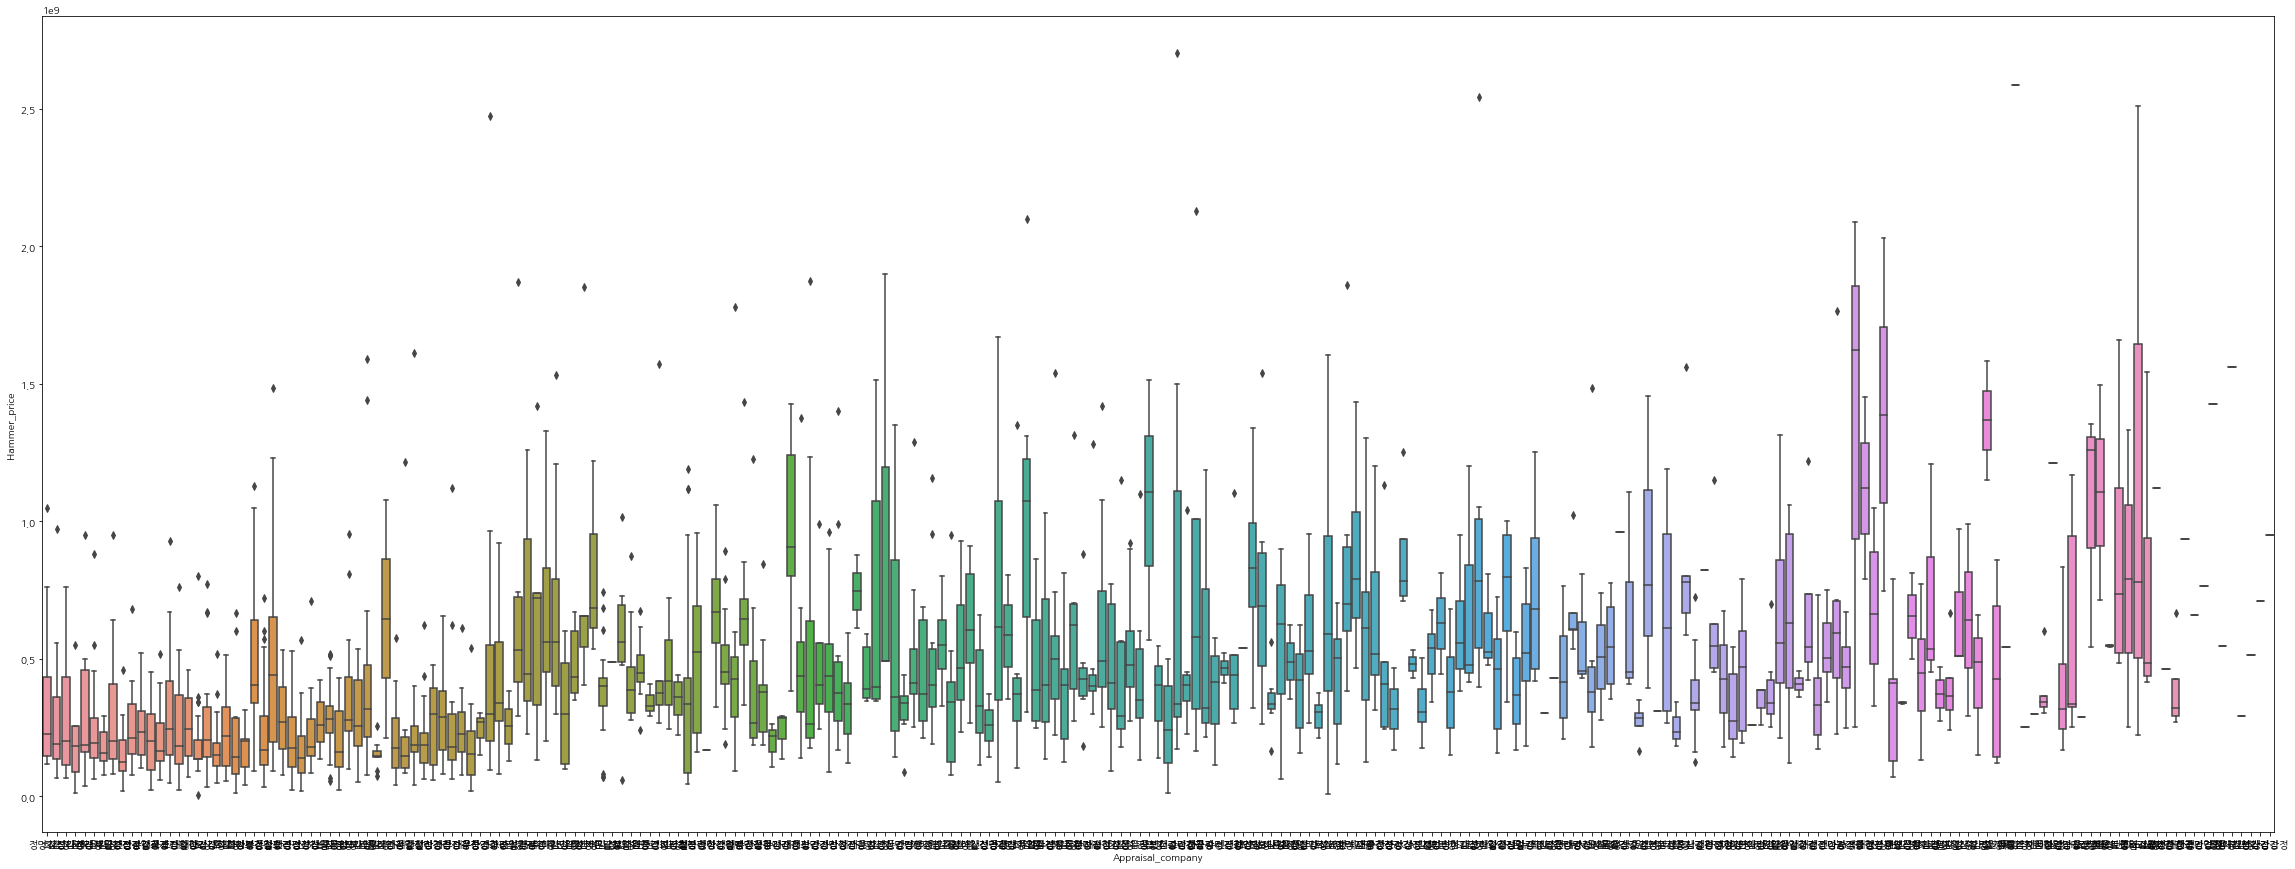

In [15]:
figure, ax1 = plt.subplots(figsize=(40,15))


sns.boxplot(x='Appraisal_company',y="Hammer_price", data = data )

**감정사가 엄청 많다. 은근 차이는 있어보이는게 있는데 clustering해볼 만 하다 생각함 (구 묶는거랑 비슷....)**

##### 3) Share_auction_YorN

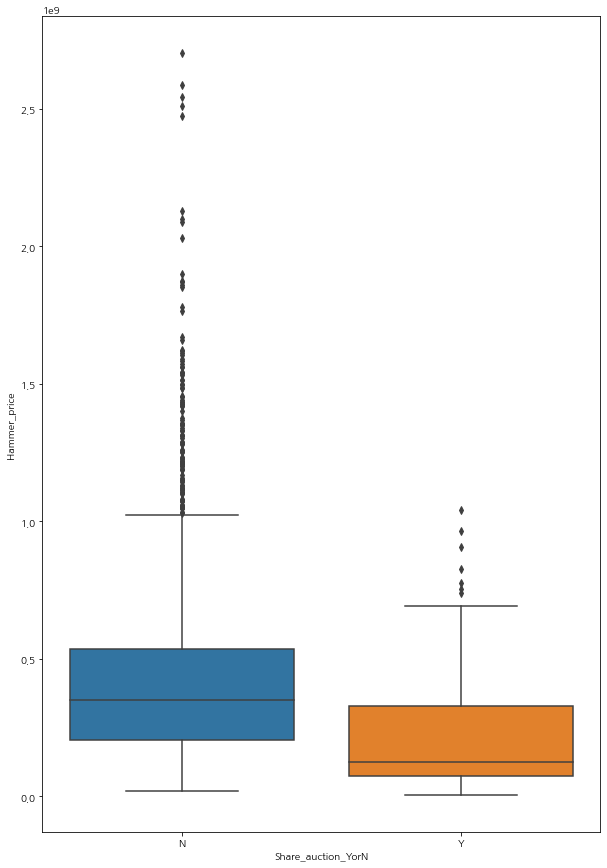

In [16]:
figure, ax1 = plt.subplots(figsize=(10,15))


sns.boxplot(x='Share_auction_YorN',y="Hammer_price", data = data )

**Share_auction_YorN의 카테고리에 따른 Y의 차이가 커보이진 않는다**

##### 4) Close_result



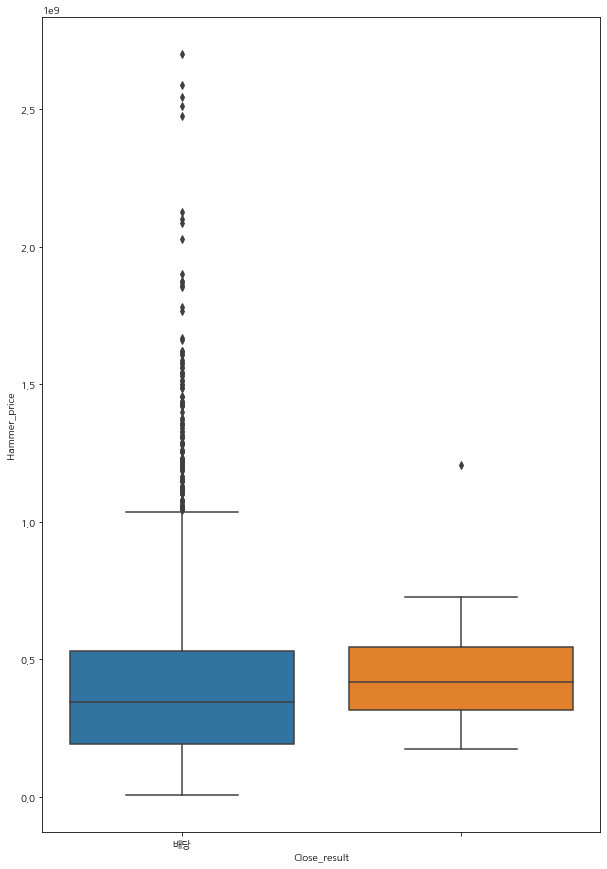

In [17]:
figure, ax1 = plt.subplots(figsize=(10,15))


sns.boxplot(x='Close_result',y="Hammer_price", data = data )

**Close_result의 카테고리에 따른 Y의 차이가 커보이진 않는다**

##### 5) addr_do

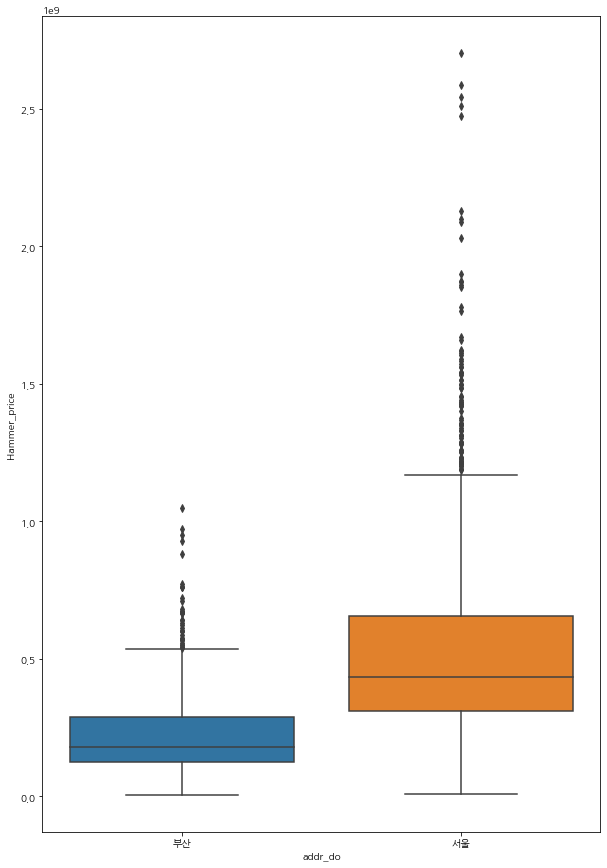

In [18]:
figure, ax1 = plt.subplots(figsize=(10,15))


sns.boxplot(x='addr_do',y="Hammer_price", data = data )

**서울 부산 여부에 따른 Y의 차이가 어느 정도 존재**

##### 6) Apartment_usage

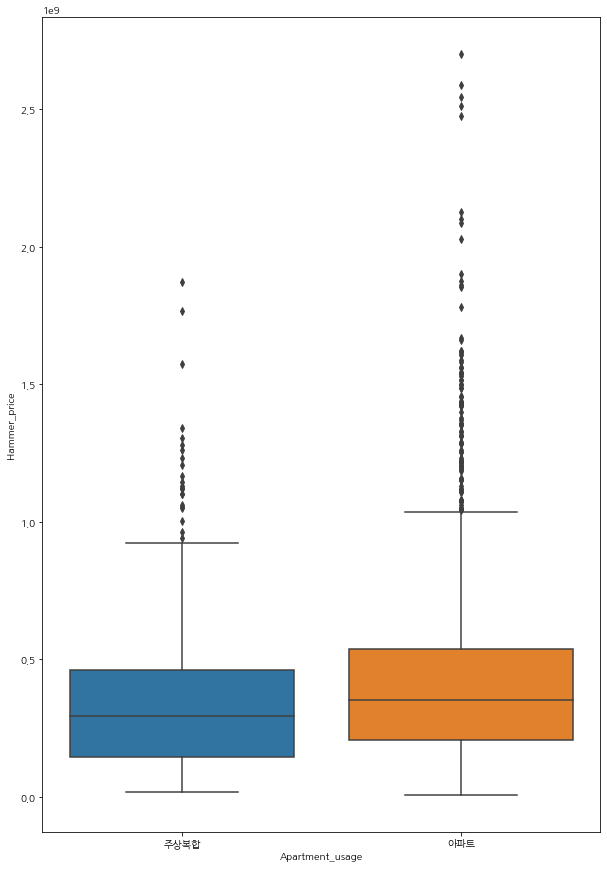

In [19]:
figure, ax1 = plt.subplots(figsize=(10,15))


sns.boxplot(x='Apartment_usage',y="Hammer_price", data = data )

**Apartment_usage의 category에 따른 Y의 차이가 없어보임**

## 3. 층 수에 대한 고민

전체 층 수에서 해당 주택이 몇 층에 있는지 확인하는 변수를 생성

In [20]:
data['floor_importance'] = data['Current_floor'] / data['Total_floor']

In [21]:
data.corr()['Hammer_price']

index                          0.377009
Auction_key                   -0.567600
Claim_price                    0.171794
Auction_count                 -0.092586
Auction_miscarriage_count     -0.085099
Total_land_gross_area          0.116462
Total_land_real_area           0.442568
Total_land_auction_area        0.457792
Total_building_area            0.628985
Total_building_auction_area    0.637609
Total_appraisal_price          0.974735
Minimum_sales_price            0.989284
addr_bunji1                   -0.006176
addr_bunji2                    0.001883
Total_floor                    0.196538
Current_floor                  0.146635
road_bunji1                    0.020693
road_bunji2                    0.192298
point.y                        0.424779
point.x                       -0.423866
Hammer_price                   1.000000
floor_importance               0.005284
Name: Hammer_price, dtype: float64

**그러나 correlation이 높지 않음을 확인할 수 있다.**

## 4. 변수 간의 Correlation 확인



##### 1)결측치 확인

In [22]:
data.isna().sum()

index                             0
Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1832
addr_san                          0
addr_bunji1                       4
addr_bunji2                     990
addr_etc                    

결측치가 대부분인 **addr_li / addr_bunji2 / Specific / road_bunji2** 을 drop한다.

In [23]:
data_1 = data.drop(['addr_li', 'addr_bunji2', 'Specific', 'road_bunji2'],axis='columns')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


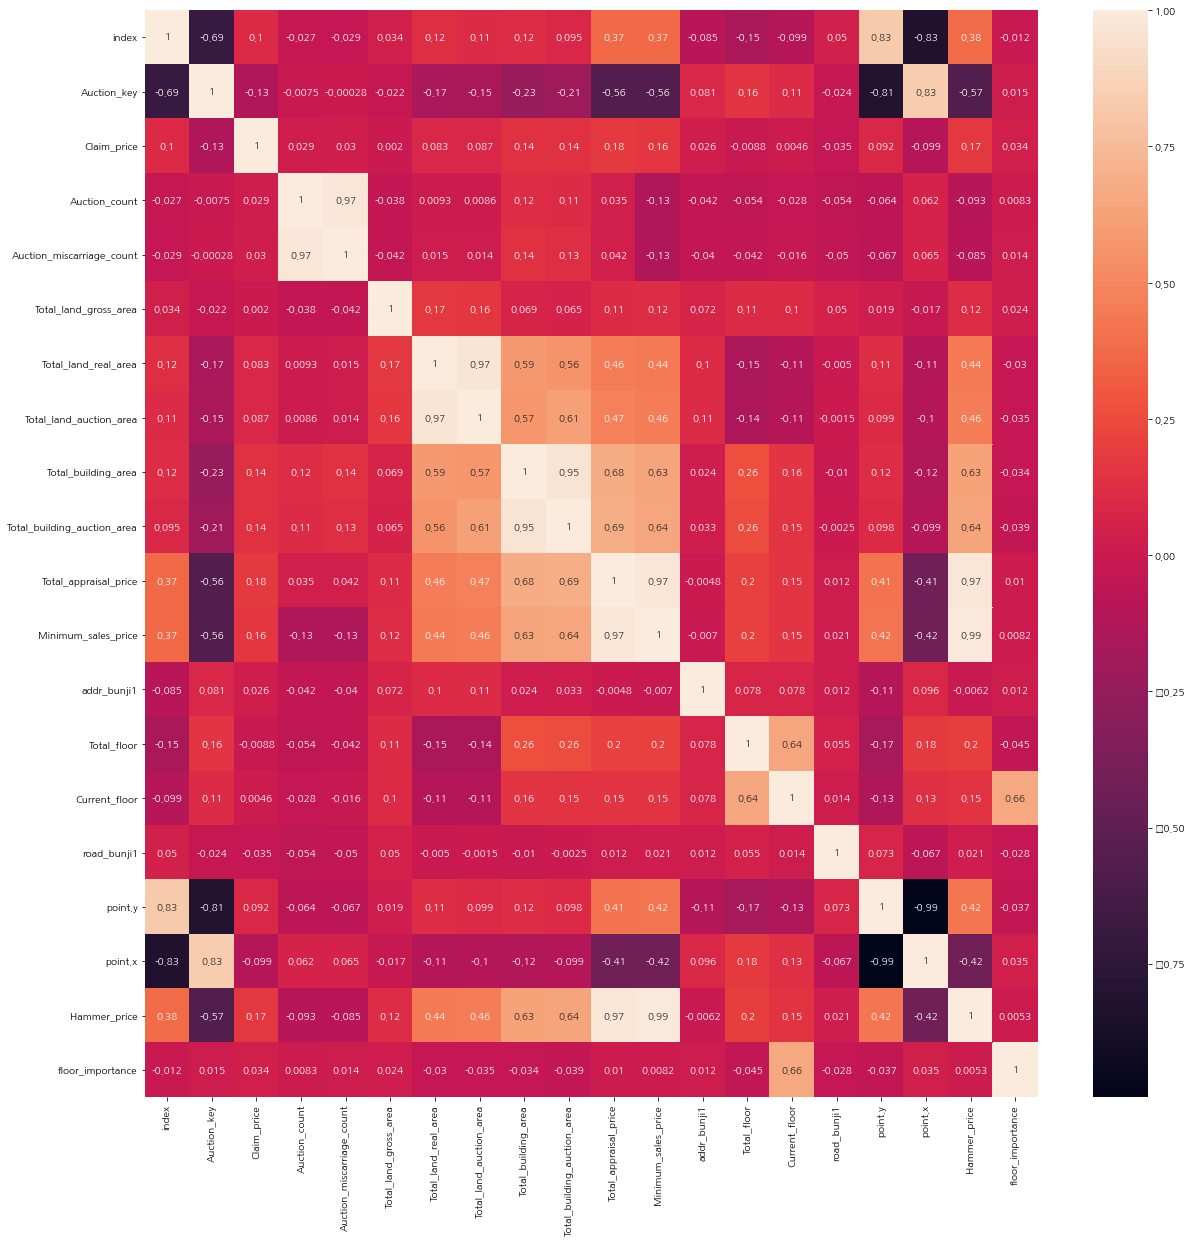

In [24]:
plt.figure(figsize=(20,20))

sns.heatmap(data_1.iloc[:,:].corr(),annot=True, annot_kws ={'size' :10} )

**Auction_count와 Auction_carriage_count는 서로 상관도가 매우 높기에 하나만 사용해도 될 것 같다**

**위에서 Y와의 correlation이 높으면서 서로의 correlation도 높은 6개의 변수를 선택하여 따로 뽑아내었다**.

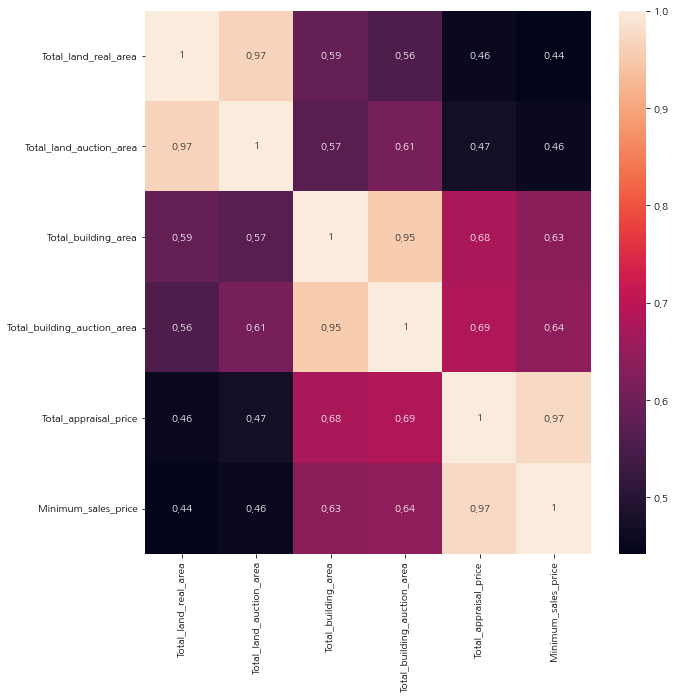

In [25]:
plt.figure(figsize=(10,10))

sns.heatmap(data_1.iloc[:,10:16].corr(),annot=True)

**여기서 total_land_real_area 와 Total_land_auction_area는 서로 상관계수가 1이므로 하나를 임의로 제거하였다**

In [26]:
data_2 = data_1.drop(['Total_land_real_area'],axis='columns')

**여전히 5개의 변수는 서로 상관계수가 높기에 이를 FA를 통해 줄이는 과정을 진행하였다.**

FA 이전에 factor의 갯수를 pca를 기반으로 정하기에 PCA를 먼저 진행

In [27]:
from sklearn.preprocessing import StandardScaler

data_4pca = data_2.iloc[:,10:15]

##표준화
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data_4pca), columns=data_4pca.columns, index = data_4pca.index)



In [28]:
data_scaled.cov() ##데이터의 공분산행렬

,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price
Total_land_auction_area,1.000539,0.569966,0.610932,0.470666,0.457092
Total_building_area,0.569966,1.000539,0.954679,0.679108,0.634408
Total_building_auction_area,0.610932,0.954679,1.000539,0.685562,0.642776
Total_appraisal_price,0.470666,0.679108,0.685562,1.000539,0.973179
Minimum_sales_price,0.457092,0.634408,0.642776,0.973179,1.000539


In [29]:
data_scaled.corr() ##데이터의 상관도행렬

,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price
Total_land_auction_area,1.000000,0.569659,0.610602,0.470412,0.456845
Total_building_area,0.569659,1.000000,0.954164,0.678742,0.634066
Total_building_auction_area,0.610602,0.954164,1.000000,0.685192,0.642429
Total_appraisal_price,0.470412,0.678742,0.685192,1.000000,0.972654
Minimum_sales_price,0.456845,0.634066,0.642429,0.972654,1.000000


In [30]:
#PCA 진행
!pip install factor_analyzer
from sklearn.decomposition import PCA
pca = PCA(random_state=2016147006)
X_p = pca.fit_transform(data_scaled)

#Eigenvalue 구하기
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=data_scaled.shape[1], rotation= None)
fa.fit(data_scaled)

ev, v = fa.get_eigenvalues()
ev

array([3.69637811, 0.74050719, 0.49329287, 0.04441283, 0.025409  ])

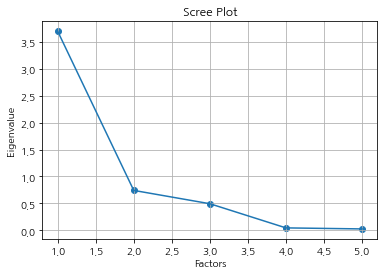

In [31]:
##PC의 Scree Plot 그리기

plt.scatter(range(1, data_scaled.shape[1]+1),ev)
plt.plot(range(1,data_scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

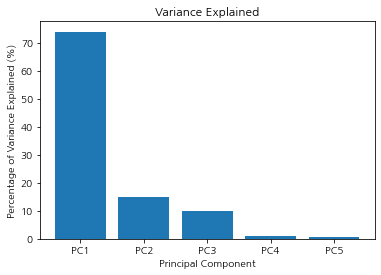

In [32]:
# 분산 설명 비율을 활용한 plot 그리기
import numpy as np
each_variance_ratio = pca.explained_variance_ratio_

# 누적 분산 설명 비율

cumsum = np.cumsum(pca.explained_variance_ratio_)

pd.Series(np.cumsum(pca.explained_variance_ratio_)) #고유값을 기준으로 설명 가능한 분산 (누적)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

**Scree Plot과 Variance Explained plot을 이용해 2개의 주성분을 활용하기로 결정하였다.**

In [33]:
pd.DataFrame(pca.components_[:,:2], 
             columns = ['PC1','PC2'], 
             index=data_scaled.columns)

,PC1,PC2
Total_land_auction_area,0.364521,0.468739
Total_building_area,-0.576668,-0.260798
Total_building_auction_area,-0.729452,0.485690
Total_appraisal_price,0.048693,0.688516
Minimum_sales_price,0.010328,-0.048146


**각 주성분에서의 Loading을 확인할 수 있다**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


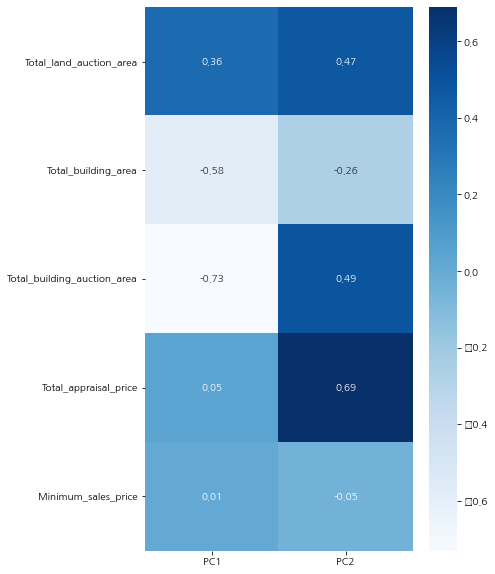

In [34]:
pca_result = pd.DataFrame(pca.components_[:,:2], 
             columns = ['PC1','PC2'], 
             index=data_scaled.columns)
plt.figure(figsize=(6,10))
sns.heatmap(pca_result, cmap="Blues", annot=True, fmt='.2f') #소수 둘째자리까지

**heatmap으로는 위와같이 나타낼 수 있다.**

**이제 위의 결과를 이용해 2개의 Factor를 사용하는 FA를 진행**

그에 앞서 FA를 진행해도 되는 data set인지 검증하기 위해 bartlett test와 kmo 테스트를 진행

In [35]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scaled)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(12014.927049535188, 0.0)

In [36]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model =calculate_kmo(data_scaled)
kmo_model 

0.7239041652624192

**모두 통과하여 FA를 진행해도 된다**

In [37]:
fa = FactorAnalyzer(n_factors=2, rotation = "varimax")
fa.fit(data_scaled)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

**Varimax를 이용하여 Factor 2개를 얻어냄**

In [38]:
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2'],
                                 index=data_scaled.columns)
fa_result_loading

,Factor1,Factor2
Total_land_auction_area,0.542067,0.279064
Total_building_area,0.886578,0.343555
Total_building_auction_area,0.945575,0.327601
Total_appraisal_price,0.419877,0.882828
Minimum_sales_price,0.356473,0.931916


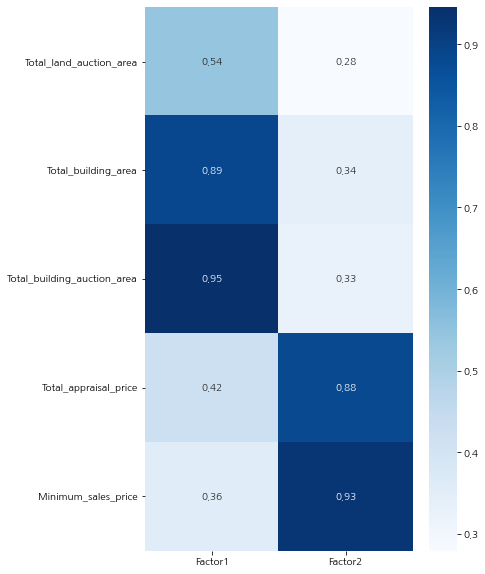

In [39]:
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

**Factor의 Loading을 heatmap으로 확인할 수 있다**

In [40]:
##Factor를 통해 설명되는 분산을 확인

fa.get_factor_variance()
fa_result_fromLoading = pd.DataFrame(fa.get_factor_variance(), columns = ['Factor1', 'Factor2'])
fa_result_fromLoading.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']
fa_result_fromLoading

,Factor1,Factor2
SS Loadings,2.277338,1.951081
Proportion Var,0.455468,0.390216
Cumulative Var,0.455468,0.845684


**위의 결과를 통해 2개의 Factor를 다음과 같이 정의하였다.**

**Factor 1 : 면적에 관련된 Factor**

**Factor 2 : 가격에 관련된 Factor**

In [41]:
X_f = fa.fit_transform(data_scaled)
X_ff = pd.DataFrame(X_f[:,:2], 
                    columns = ['Area','Price'], 
                    index = data_scaled.index)
X_ff

,Area,Price
0,2.472584,0.125017
1,0.247838,1.661324
2,-0.802267,-0.761963
3,0.089588,-0.543942
4,0.217410,-0.936418
...,...,...
1928,-0.157609,0.140107
1929,0.825612,-0.348447
1930,0.491432,2.179787
1931,-0.050179,-0.150101


**2개의 Factor를 Area와 Price로 명명하고 loading에 맞추어 data값을 계산하였다**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


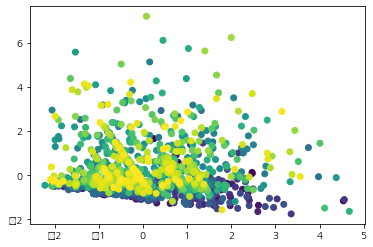

In [42]:
# Score Plot 1
plt.scatter(x=X_ff['Area'],y=X_ff['Price'], c=X_ff.index)

**score plot이 매우 선형적인 형태를 띠고 있음을 볼 수 있다**

## 5. 2개의 Factor를 활용한 선형회귀

In [43]:
##2개의 factor와 Y로 이루어진 DF 만듦
new_data = pd.concat([X_ff, data_1['Hammer_price']],axis=1)

In [44]:
from statsmodels.formula.api import ols
res = ols('Hammer_price~Area+Price',data= new_data).fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Hammer_price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 4.577e+04
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        15:36:20   Log-Likelihood:                -35445.
No. Observations:                1855   AIC:                         7.090e+04
Df Residuals:                    1852   BIC:                         7.091e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.258e+08   1.12e+06    380.903      0.000    4.24e+08    4.28e+08
Area        1.207e+08   1.12e+06    108.115      0.000    1.19e+08    1.23e+08
Price       3.167e+08   1.12e+06    282.470      0.000    3.15e+08    3.19e+08
==============================================================================
Omnibus:                     1010.206   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28867.548
Skew:                           1.997   Prob(JB):                         0.00
Kurtosis:                      21.909   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-square와 Adj. R-square 등 매우 좋은 적합도를 보여준다**

### **위의 과정을 통해 최종적으로 모델에 사용할 변수들을 골라내었다**

(아직까진 계획을 모아놓은 것... 나중에 다른 분들 ipynb와 합쳐서 최종 정리를 하면 좋지 않을까 싶습니다!)


**Auction_count: 총 경매횟수** -> Y에 크게 영향력은 없음

----------------------------------------------



**Total_land_gross_area: 총 토지 전체면적 ($m^2$)**

**Total_land_real_area: 총 토지 실면적 ($m^2$)**

**Total_land_auction_area: 총 토지 경매 면적 ($m^2$)**

**Total_building_area: 총 건물 면적 ($m^2$)**

**Total_building_auction_area: 총 건물 경매 면적 ($m^2$)**

**Total_appraisal_price: 총 감정가**

**Minimum_sales_price: 최저 매각 가격 (입찰 시 최저로 제시해야 하는 금액)**

**-> 2개의 factor로 만들어서 사용**

-------------------------------------------------------

**새로운 변수: (Final_auction_date) - (First_auction_date)**




---------------------------------
**addr_si: 주소 - 시군구**

**addr_dong: 주소 - 읍면동**

**> clustering해서 score 주기**

---------------------------------










*고층 건물은 의미 있을 수도 있으니 나중에 확인*




-----------------------

Hammer_price: 낙찰가